First: import the requested packages

In [7]:
import autograd.numpy as np
import autograd as ag
import time
from matplotlib import pyplot as plt
import seaborn as sns

Define the function to be minimized

f : $R^N $ --> $R$

\begin{aligned}
&f(x)=\sum_{i=1}^{10}\left[e^{-t_i x_1}-e^{-t_i x_2}-x_3\left(e^{-t_i}-e^{-10 t_i}\right)\right]^2, \\
&ti=0.1i\end{aligned}

Setting the initial point x

In [8]:
#example

N=3

def f(x):
    r = 0
    for i in range(10):
        r += (np.exp(-(0.1 * (i + 1) * x[0])) - np.exp(-(0.1 * (i + 1) * x[1])) - x[2] * (
                 np.exp(-(0.1) * (i + 1)) - np.exp(-10 * (0.1) * (i + 1)))) ** 2
    return r


x= np.array([0.0,10.0,20.0])

Defining the **armijo function** : this funcions return a number alpha that satisfies the armijo condition.

In [9]:
def armijo(f,x,d):
    delta= 0.5
    gamma= 10e-3
    armijo = 1
    while f(x + armijo * d) > f(x) + gamma * armijo * (np.dot(g(x), d)):
        armijo = delta * armijo
    return armijo

Define:

**tollerance**    g_toll

**the gradient of the function to be minimized**    g

**the hessian of the function to be minimized**    h

In [10]:
g= ag.grad(f)
h= ag.hessian(f)
g_toll = 10e-6

Defining the **Conjugate-Gradient function**: this function return a direction d calculated by the Conjugate-Gradient method

In [11]:
eps1 = 10e-6
eps2 = 10e-4

def CG(f,x):
    d=0
    b=0
    s= -g(x)
    if np.dot(np.dot(s,h(x)),s)< eps1*(np.linalg.norm(s))**2:
        d= -g(x)
    else:
        a= -(np.dot((np.dot(h(x),d)+g(x)),s))/(np.dot(np.dot(s,h(x)),s))
        d= d+ a*s
        while np.linalg.norm(np.dot(h(x),d)+g(x)) > (1/(k+1))*eps2*np.linalg.norm(g(x)):
            b= np.dot(np.dot((np.dot(h(x),d)+g(x)),h(x)),s)/(np.dot(np.dot(s,h(x)),s))
            s = -(np.dot(h(x),d)+g(x)) + b*s
            if np.dot(np.dot(s,h(x)),s) < eps1*(np.linalg.norm(s))**2:
                break
            else:
                a = -(np.dot((np.dot(h(x),d)+g(x)),s))/(np.dot(np.dot(s,h(x)),s))
                d = d + a*s
    return d

The main algorithm is the follow:

In [12]:
k=0 # number of iteration
to_plot= []
while np.linalg.norm(g(x))> g_toll:

    d= CG(f,x)

    a= armijo(f,x,d)
   
    x= x+a*d

    k+=1
    
    to_plot.append(np.linalg.norm(g(x)))
    

print("x*:",x)
print("f(x*):", f(x))
print("number of iterations:",k)


x*: [ 0.99999846 10.00001422  1.00000095]
f(x*): 1.478016114972204e-13
number of iterations: 14


Now we can plot the speed of convergence

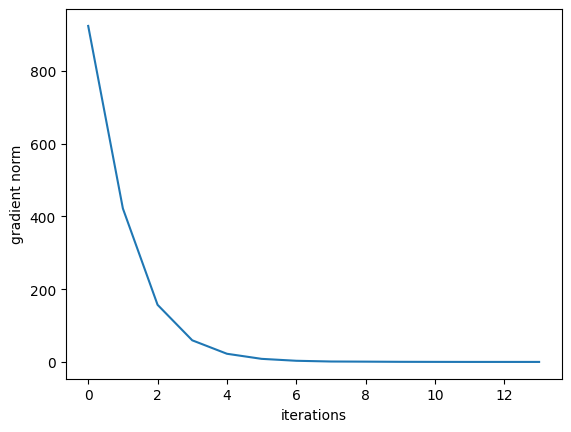

In [13]:
sns.lineplot(to_plot)
plt.xlabel("iterations")
plt.ylabel("gradient norm")
plt.show(to_plot)